# 머신러닝 - Random forest

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
os.chdir('/content/drive/My Drive/gold/data')

In [0]:
# 데이터 불러오기
gold = pickle.load(open('gold_price.pkl','rb'))

In [0]:
# 데이터 추출
feature = gold.loc[:, ['index_price', 'cny/krw', 'usd/krw', '100jpy/krw', 'eur/krw', 'gbp/krw', 'nasdaq', 'kospi', 'dow', 'snp500']]

In [0]:
# 데이터 추출
feature = gold.loc[:, ['index_price', 'cny/krw', 'usd/krw', '100jpy/krw',
                       'eur/krw', 'gbp/krw', 'nasdaq', 'kospi', 'dow',
                       'snp500']]
# scale
scaler = StandardScaler()
scaler.fit(feature)
X_scaled = scaler.transform(feature)
X_scaled = pd.DataFrame(X_scaled)

In [21]:
feature.head(3)

,index_price,cny/krw,usd/krw,100jpy/krw,eur/krw,gbp/krw,nasdaq,kospi,dow,snp500
Date,,,,,,,,,,
2010-01-04,77.830,168.83,1152.5,1240.85,1650.50,1861.06,2303.361914,1690.367993,10526.854102,1126.594019
2010-01-05,77.850,167.27,1142.0,1241.17,1646.99,1832.45,2306.808008,1694.339990,10567.135547,1134.398023
2010-01-06,77.655,166.45,1136.5,1233.32,1628.60,1821.47,2303.928027,1702.301978,10570.723828,1136.625977


In [22]:
X_scaled.head(3)

,0,1,2,3,4,5,6,7,8,9
0,-1.221158,-0.632753,0.730331,0.593997,2.378840,1.425178,-1.289121,-1.755451,-1.367672,-1.409943
1,-1.218724,-0.871076,0.490645,0.595799,2.347543,1.222797,-1.287163,-1.735130,-1.359342,-1.395903
2,-1.242461,-0.996349,0.365095,0.551596,2.183565,1.145126,-1.288800,-1.694395,-1.358600,-1.391894


In [0]:
# 데이터 분할 하기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, gold['USD/T.oz'], shuffle=False, test_size=0.3)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1608, 10), (690, 10), (1608,), (690,))

In [0]:
# X = gold['index_price'].values
# y = gold['USD/T.oz'].values

In [0]:
# X = X.reshape(-1, 1)
# y = y.reshape(-1, 1)

# Test1
### control: n_estimators, max_features, min_samples_leaf

In [27]:
# 모델 정의
rm = RandomForestRegressor(criterion='mse', random_state=0, n_jobs=-1)
params = {'n_estimators': [500,1000], 'max_features': ['auto', 'sqrt']}

rm_cv = GridSearchCV(rm, params, return_train_score=True, error_score='raise', cv=5)
rm_cv.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': ['auto', 'sqrt'],
              

In [28]:
# best 파라미터
rm_cv.best_params_

{'max_features': 'sqrt', 'n_estimators': 1000}

In [29]:
# best 파라미터로 모델 fit
rm_best = RandomForestRegressor(**rm_cv.best_params_)
rm_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
# train data 확인
train_pred = rm_best.predict(X_train)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


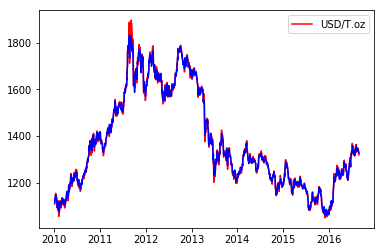

In [31]:
# 그래프로 확인
plt.plot(gold.index[:1608], y_train, c='r')
plt.plot(gold.index[:1608], train_pred, c='b')
plt.legend()
plt.show()

In [0]:
# 모델 예측
pred = rm_best.predict(X_test)

In [34]:
# rmse
rmse = mean_squared_error(y_test, pred)**0.5
print('rmse: {:.3f}'.format(rmse))

# mae
mae = mean_absolute_error(y_test, pred)
print('mae: {:.3f}'.format(mae))

rmse: 50.260
mae: 40.478


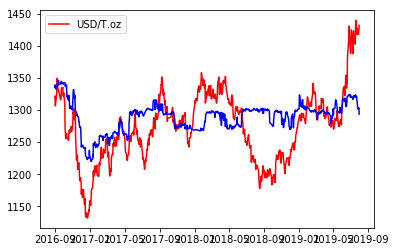

In [35]:
# 그래프로 확인
plt.plot(gold.index[1608:], y_test, c='r')
plt.plot(gold.index[1608:], pred, c='b')
plt.legend()
plt.show()

# Test2 
### control: n_estimators 

In [36]:
rm = RandomForestRegressor(criterion='mse', random_state=0, n_jobs=-1)
params = {'n_estimators': [500,1000]}

rm_cv = GridSearchCV(rm, params, return_train_score=True, error_score='raise')
rm_cv.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'n_estimators': [500, 1000]},
             pre_dispatch=

In [37]:
# best 파라미터
rm_cv.best_params_

{'n_estimators': 500}

In [38]:
# best 파라미터로 모델 fit
rm_best = RandomForestRegressor(**rm_cv.best_params_)
rm_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
# train data 확인
train_pred = rm_best.predict(X_train)

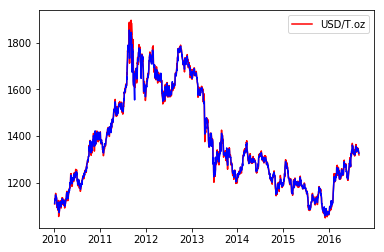

In [49]:
# 그래프로 확인
plt.plot(gold.index[:1608], y_train, c='r')
plt.plot(gold.index[:1608], train_pred, c='b')
plt.legend()
plt.show()

In [0]:
# 모델 예측
test_pred = rm_best.predict(X_test)

In [51]:
# rmse
rmse = mean_squared_error(y_test, test_pred)**0.5
print('rmse: {:.3f}'.format(rmse))

# mae
mae = mean_absolute_error(y_test, test_pred)
print('mae: {:.3f}'.format(mae))

rmse: 54.917
mae: 45.603


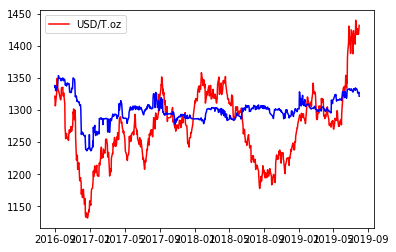

In [52]:
# 그래프로 확인
plt.plot(gold.index[1608:], y_test, c='r')
plt.plot(gold.index[1608:], test_pred, c='b')
plt.legend()
plt.show()

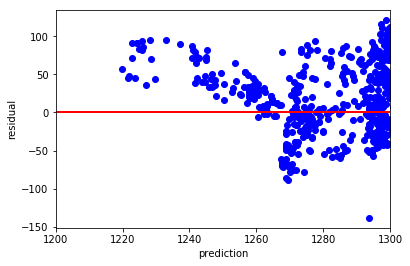

In [53]:
# 잔차 확인
plt.scatter(pred, pred-y_test, c='blue', marker='o')
plt.xlabel('prediction')
plt.ylabel('residual')
plt.hlines(y=0, xmin=900, xmax=1500, lw=2, color='red')
plt.xlim([1200, 1300])
plt.show()